# Task 1

Run a multilayer perceptron (feed forward neural network) with two hidden layers and rectified linear nonlinearities on the iris dataset using the keras​ Sequential interface​. Include code for selecting regularization strength and number of hidden units using GridSearchCV and evaluation on an independent test-set.


In [0]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

num_classes = len(set(y))

import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

from keras import regularizers

In [0]:
def model(hidden_size_1, hidden_size_2, optimizer="adam", C=1):
    model = Sequential([
        Dense(hidden_size_1, input_shape=(4,), kernel_regularizer=regularizers.l2(C)),
        Activation('relu'),
        Dense(hidden_size_2, kernel_regularizer=regularizers.l2(C)),
        Activation('relu'),
        Dense(3),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer,loss="categorical_crossentropy", 
                  metrics=['accuracy'])
    return model

GridSearch the parameters of network to find out the best combination of parameters that achieves the highest score.

In [0]:
clf = KerasClassifier(model)
ss = StratifiedShuffleSplit(n_splits=5)
param_grid = {'C': [.01, 1, 10], 
              'hidden_size_1': [32, 256, 512],  
              'hidden_size_2': [32, 256, 512]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=ss)
grid.fit(X_train, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
100/100 [==============================] - 0s 102us/step
Epoch 1/1
100/100 [==============================] - 0s 109us/step
Epoch 1/1
100/100 [==============================] - 0s 104us/step
Epoch 1/1
100/100 [==============================] - 0s 99us/step
Epoch 1/1
100/100 [==============================] - 0s 116us/step
Epoch 1/1
100/100 [==============================] - 0s 116us/step
Epoch 1/1
100/100 [==============================] - 0s 124us/step
Epoch 1/1
100/100 [==============================] - 0s 129us/step
Epoch 1/1
100/100 [==============================] - 0s 129us/step
Epoch 1/1
100/100 [==============================] - 0s 111us/step
Epoch 1/1
100/100 [==============================] - 0s 111us/step
Epoch 1/1
100/100 [==============================] - 0s 123us/step
Epoch 1/1
100/100 [==============================] - 0s 129us/step
Epoch 1/1


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size='default',
            train_size=None),
       error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd8957b6320>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 1, 10], 'hidden_size_1': [32, 256, 512], 'hidden_size_2': [32, 256, 512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
import pandas as pd
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_C", "param_hidden_size_1", "param_hidden_size_2"],
                values=['mean_train_score', "mean_test_score"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

mean_test_score  \
param_C param_hidden_size_1 param_hidden_size_2                    
0.01    32                  32                          0.383333   
                            256                         0.466667   
                            512                         0.466667   
        256                 32                          0.483333   
                            256                         0.650000   
                            512                         0.716667   
        512                 32                          0.483333   
                            256                         0.716667   
                            512                         0.633333   
1.00    32                  32                          0.400000   
                            256                         0.533333   
                            512                         0.400000   
        256                 32                          0.416667   
                            256                         0.366667   
                            512                         0.400000   
        512                 32                          0.533333   
                            256                         0.383333   
                            512                         0.533333   
10.00   32                  32                          0.333333   
                            256                         0.333333   
                            512                         0.400000   
        256                 32                          0.333333   
                            256                         0.300000   
                            512                         0.366667   
        512                 32                          0.266667   
                            256                         0.466667   
                            512                         0.433333   

                                                 mean_train_score  
param_C param_hidden_size_1 param_hidden_size_2                    
0.01    32                  32                              0.364  
                            256                             0.454  
                            512                             0.470  
        256                 32                              0.482  
                            256                             0.626  
                            512                             0.722  
        512                 32                              0.512  
                            256                             0.716  
                            512                             0.634  
1.00    32                  32                              0.400  
                            256                             0.496  
                            512                             0.408  
        256                 32                              0.456  
                            256                             0.424  
                            512                             0.406  
        512                 32                              0.536  
                            256                             0.440  
                            512                             0.514  
10.00   32                  32                              0.330  
                            256                             0.334  
                            512                             0.404  
        256                 32                              0.326  
                            256                             0.334  
                            512                             0.348  
        512                 32                              0.266  
                            256                             0.470  
                            512                             0.420

In [0]:
grid.best_params_

{'C': 0.01, 'hidden_size_1': 256, 'hidden_size_2': 512}

In [0]:
grid.best_score_

0.7166666865348816

The best combination of parameters are "C=1", "hidden_size_1=256", and "hidden_size_2=512", with the highest accuracy as 0.71 as the test_mean_score.

In [0]:
best_model = model(hidden_size_1=grid.best_params_['hidden_size_1'], hidden_size_2=grid.best_params_['hidden_size_2'], optimizer="adam", 
                   C=grid.best_params_['C'])
best_model.history=best_model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=.1)

Train on 100 samples, validate on 12 samples
Epoch 1/20
100/100 [==============================] - 11s 112ms/step - loss: 4.4869 - acc: 0.3500 - val_loss: 3.9525 - val_acc: 0.5833
Epoch 2/20
100/100 [==============================] - 0s 293us/step - loss: 3.8741 - acc: 0.5300 - val_loss: 3.5356 - val_acc: 0.8333
Epoch 3/20
100/100 [==============================] - 0s 271us/step - loss: 3.4343 - acc: 0.6900 - val_loss: 3.2552 - val_acc: 0.6667
Epoch 4/20
100/100 [==============================] - 0s 255us/step - loss: 3.1360 - acc: 0.6700 - val_loss: 2.8424 - val_acc: 0.6667
Epoch 5/20
100/100 [==============================] - 0s 257us/step - loss: 2.7095 - acc: 0.8000 - val_loss: 2.6153 - val_acc: 0.5833
Epoch 6/20
100/100 [==============================] - 0s 254us/step - loss: 2.4707 - acc: 0.8200 - val_loss: 2.3505 - val_acc: 0.9167
Epoch 7/20
100/100 [==============================] - 0s 278us/step - loss: 2.2180 - acc: 0.9600 - val_loss: 2.1181 - val_acc: 0.8333
Epoch 8/20
100/1

In [0]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.809
Test Accuracy: 0.974


Retrain the model with the best combination of parameters, and evaluate its performance on the test set: the test loss in 0.809, and the test accuarcy is 0.974. The high accuracy of the test set might as a result of the small test size. There are only 38 test data in the test set, which is easy to achieve a high accuarcy. However, it also somewhat represents the good performance of the model. Also, since there are too many densed layers in the model, the model finally is a bit overfitting with the such small dataset.

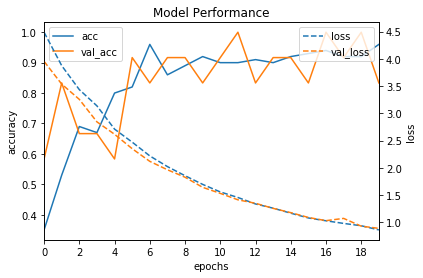

In [0]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(best_model.history.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")
plt.xticks(np.arange(0, 20, step=2))

_ = plt.title("Model Performance")